In [1]:
import pandas as pd
import numpy as np
import copy
import random
import re

### Part 1: Read in the file

In [2]:
# specify the path
path= '/Users/philhuang/Desktop/Phil_projects/P7_PhilHuang/workingdata/'

# read in the data
data= pd.read_csv(path+'amazon_alexa.tsv', sep='\t')

In [3]:
# check data
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
# check the missing values
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [5]:
# check the summary statistics
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
# check the summary statistics of the strings
data.describe(include='object')

,date,variation,verified_reviews
count,3150,3150,3150
unique,77,16,2301
top,30-Jul-18,Black Dot,
freq,1603,516,79


In [7]:
# check how many products are there 
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [8]:
# check the length of reviews
data['length']=data['verified_reviews'].apply(len)

### Part 2 - Feature engineering
* Assign sentiment

In [9]:
from textblob import TextBlob

# find the sentiment of reviews
# Polarity: positive, negative or neutral, with +1 meaning positive sentiment, 
# 0 for neutral, and -1 for negative sentiment
def get_polarity(text):
    textblob=TextBlob(str(text.encode('utf-8')))
    pol=textblob.sentiment.polarity
    return pol

# construct polarity feature
data['polarity']=data['verified_reviews'].apply(get_polarity)

In [10]:
data.head(10)

,rating,date,variation,verified_reviews,feedback,length,polarity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.625000
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.875000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,-0.100000
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.350000
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.000000
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,172,0.294643
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,365,0.216667
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221,0.200000
8,5,30-Jul-18,Heather Gray Fabric,looks great,1,11,0.800000
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,114,0.988281


In [11]:
# subjectivity: 1 meaning very subjective, 0 meaning very objective
def get_polarity(text):
    textblob=TextBlob(str(text.encode('utf-8')))
    pol=textblob.sentiment.subjectivity
    return pol

# construct subjectivity feature
data['subjectivity']=data['verified_reviews'].apply(get_polarity)

In [12]:
data.head(5)

,rating,date,variation,verified_reviews,feedback,length,polarity,subjectivity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.625,0.6000
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.875,0.8000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,-0.100,0.5125
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.350,0.4500
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.000,0.0000


In [13]:
# check the summary statistics
data[['length', 'polarity', 'subjectivity']].describe()

,length,polarity,subjectivity
count,3150.000000,3150.000000,3150.000000
mean,132.049524,0.349792,0.528922
std,182.099952,0.303362,0.256324
min,1.000000,-1.000000,0.000000
25%,30.000000,0.123852,0.419196
50%,74.000000,0.350000,0.585000
75%,165.000000,0.533333,0.695486
max,2851.000000,1.000000,1.000000


* generating features

In [14]:
# calculate the length of the review by letter
data['char_count']=data['verified_reviews'].apply(len)

# tokenize the reviews by word
data['word_count']=data['verified_reviews'].apply(lambda x:len(x.split()))

# calculate the word density
data['word_density']=data['char_count']/(data['word_count']+1)

In [15]:
data.head(5)

,rating,date,variation,verified_reviews,feedback,length,polarity,subjectivity,char_count,word_count,word_density
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.625,0.6000,13,3,3.250000
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.875,0.8000,9,2,3.000000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,-0.100,0.5125,195,38,5.000000
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.350,0.4500,172,34,4.914286
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.000,0.0000,5,1,2.500000


In [16]:
# importing the list of punctuations
import string
punctuation=string.punctuation

# punctuation count
data['punctuation_count']=data['verified_reviews'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))
data.head(5)

,rating,date,variation,verified_reviews,feedback,length,polarity,subjectivity,char_count,word_count,word_density,punctuation_count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.625,0.6000,13,3,3.250000,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.875,0.8000,9,2,3.000000,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,-0.100,0.5125,195,38,5.000000,3
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.350,0.4500,172,34,4.914286,4
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.000,0.0000,5,1,2.500000,0


In [17]:
# check the summary statistics
data[['char_count', 'word_count', 'word_density', 'punctuation_count']].describe()

,char_count,word_count,word_density,punctuation_count
count,3150.000000,3150.000000,3150.000000,3150.000000
mean,132.049524,25.293016,4.605345,3.887937
std,182.099952,34.584971,1.134737,5.762348
min,1.000000,0.000000,0.500000,0.000000
25%,30.000000,6.000000,4.269231,1.000000
50%,74.000000,14.000000,4.805665,2.000000
75%,165.000000,32.000000,5.207974,5.000000
max,2851.000000,526.000000,32.500000,121.000000


In [18]:
# Part of speech dictionary
pos_dic={
    'noun': ['NN', 'NNS', 'NNP', 'NNPS'],
    'pron': ['PRP', 'PRP$', 'WP', 'WP$'],
    'verb': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'adj': ['JJ', 'JJR', 'JJS'],
    'adv': ['RB', 'RBR', 'RBS', 'WRB']
}

# check how many pos flgs ('noun','pron','verb','adj','adv')
def pos_check(x, flag):
    cnt=0
    try:
        wiki=TextBlob(x)
        
        # use wiki.tags to tag each word. eg: ('hey', 'NN')
        for tup in wiki.tags:
            # take out the pos flag
            ppo=list(tup)[1]
            # check if the flag is in the pos dictionary
            if ppo in pos_dic[flag]:
                cnt+=1           
    except:
        pass
    return cnt

In [19]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# count the number of noun in each obs
data['noun_count']=data['verified_reviews'].apply(lambda x: pos_check(x, 'noun'))

# count the number of verb in each obs
data['verb_count']=data['verified_reviews'].apply(lambda x: pos_check(x, 'verb'))

# count the number of pron in each obs
data['pron_count']=data['verified_reviews'].apply(lambda x: pos_check(x, 'pron'))

# count the number of adj in each obs
data['adj_count']=data['verified_reviews'].apply(lambda x: pos_check(x, 'adj'))

# count the number of adv in each obs
data['adv_count']=data['verified_reviews'].apply(lambda x: pos_check(x, 'adv'))

[nltk_data] Downloading package punkt to /Users/philhuang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/philhuang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [20]:
data.head(5)

,rating,date,variation,verified_reviews,feedback,length,polarity,subjectivity,char_count,word_count,word_density,punctuation_count,noun_count,verb_count,pron_count,adj_count,adv_count
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.625,0.6000,13,3,3.250000,1,1,1,1,0,0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.875,0.8000,9,2,3.000000,1,0,1,1,0,0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,-0.100,0.5125,195,38,5.000000,3,5,8,5,3,3
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.350,0.4500,172,34,4.914286,4,11,6,2,1,5
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.000,0.0000,5,1,2.500000,0,0,0,0,1,0


In [21]:
# check the summary staticstics
data[['noun_count', 'verb_count','pron_count', 'adj_count', 'adv_count']].describe()

,noun_count,verb_count,pron_count,adj_count,adv_count
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,5.945397,5.155873,3.242222,2.172381,2.002540
std,8.222776,7.223565,4.627235,2.935390,3.277083
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,2.000000,1.000000,1.000000
75%,7.000000,7.000000,4.000000,3.000000,3.000000
max,137.000000,102.000000,70.000000,39.000000,54.000000


### Part 3 - Data Cleaning
* Remove the following:
    * punctuation
    * numbers
    * special and accented characters
    * stopwords
* Perform stemming and lemmatization

In [22]:
# remove punctuations
def punctuation_removal(messy_str):
    # if the charactor is not a punctuation, we keep it.
    clean_list=[char for char in messy_str if char not in string.punctuation]
    clean_str=''.join(clean_list)
    return clean_str

# clean the reviews
data['verified_reviews']=data['verified_reviews'].apply(punctuation_removal)

In [23]:
# remove numbers
import re

# use regular expression to get rid of the numbers
def drop_numbers(list_text):
    list_text_new=[]
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['verified_reviews']=data['verified_reviews'].apply(drop_numbers)

In [24]:
# check the data. we can see that now the punctuations and numnbers are all removed
data['verified_reviews'].head(10)

0                                         Love my Echo
1                                             Loved it
2    Sometimes while playing a game you can answer ...
3    I have had a lot of fun with this thing My  yr...
4                                                Music
5    I received the echo as a gift I needed another...
6    Without having a cellphone I cannot use many o...
7    I think this is the th one Ive purchased Im wo...
8                                          looks great
9    Love it I’ve listened to songs I haven’t heard...
Name: verified_reviews, dtype: object

In [25]:
# tokenization: separate texts into tokens (works, characters or sentences)
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# remove special or accented characters
import unicodedata

def remove_accented_chars(text):
    new_text=unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

data['verified_reviews']=data.apply(lambda x: remove_accented_chars(x['verified_reviews']), axis=1)

In [26]:
# remove special characters
def remove_special_characters(text):
    pat=r'[^a-zA-z0-9]'
    return re.sub(pat, ' ', text)

data['verified_reviews']=data.apply(lambda x: remove_special_characters(x['verified_reviews']), axis=1)

In [27]:
# check the data 
data['verified_reviews'][:10]

0                                         Love my Echo
1                                             Loved it
2    Sometimes while playing a game you can answer ...
3    I have had a lot of fun with this thing My  yr...
4                                                Music
5    I received the echo as a gift I needed another...
6    Without having a cellphone I cannot use many o...
7    I think this is the th one Ive purchased Im wo...
8                                          looks great
9    Love it Ive listened to songs I havent heard s...
Name: verified_reviews, dtype: object

In [28]:
# remove stopwords: the, and, myself, this, into, here...
# Spacy, NLTK and Gensim can be used to remove stopwords

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philhuang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
# check the stop words:
print(stopwords.words('english'))
print(len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

* stemming and lemmatization

In [30]:
# stemming: reduce a word to its stem
# lemmatization: takes the meaning into consideration.
# good better lemmatized to good. in stemming, better might be chopped off to bet

# for stemming
import nltk

# for lemmatization
# need to run python -m spacy download en_core_web_sm in annoconda cmd first
import spacy
#nlp=spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
nlp = spacy.load("en_core_web_sm")

2023-11-06 16:26:59.686630: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/philhuang/opt/anaconda3/envs/py3k/lib/python3.9/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [32]:
# define a fucntion to stem the words
def get_stem(text):
    stemmer=nltk.porter.PorterStemmer()
    text=' '.join([stemmer.stem(word) for word in text.split()])
    return text

# define a function to lemmatize the words
def get_lem(text):
    text=nlp(text)
    text=' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

### Part 4 - Feature Extraction
* bag of words
* TF-IDF
* N-grams

In [33]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philhuang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# clean the data
corpus=[]

for i in range(0, 3150):
    # remove all unnecessary items
    review=re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])  
    # change everything to the lower case
    review=review.lower()
    # split the views 
    review=review.split()
    # stemming words
    ps=PorterStemmer()
    # stem the words if the character is not a stopword
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [35]:
# create bag of words
from sklearn.feature_extraction.text import CountVectorizer

# we build a vocabulary that only consider the top max_features ordered by term frequency across the corpus. 
cv=CountVectorizer(max_features=2500)

x=cv.fit_transform(corpus).toarray()

# take out the 'feadback' as y 
y=data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [40]:
# check the dictionary used in the BoW
cv.get_feature_names_out()

array(['abay', 'abil', 'abl', ..., 'zigbe', 'zonkedout', 'zwave'],
      dtype=object)

In [41]:
# using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(max_features=2500)

x=tf.fit_transform(corpus).toarray()
y=data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [42]:
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.21152541, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [43]:
# create bag of words with n-grams
from sklearn.feature_extraction.text import CountVectorizer

# here we use bigrams
cv=CountVectorizer(max_features=2500, ngram_range=(2, 2))  

x=cv.fit_transform(corpus).toarray()
y=data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [44]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [45]:
cv.get_feature_names_out()

array(['abil play', 'abl connect', 'abl control', ..., 'your go',
       'youtub video', 'yr old'], dtype=object)

In [46]:
# TF-IDF with n-grams
from sklearn.feature_extraction.text import TfidfVectorizer

# we use bigrams too here
tf=TfidfVectorizer(max_features=2500, ngram_range=(2, 2))

x=tf.fit_transform(corpus).toarray()
y=data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


### Part 5 - Data Visualization

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

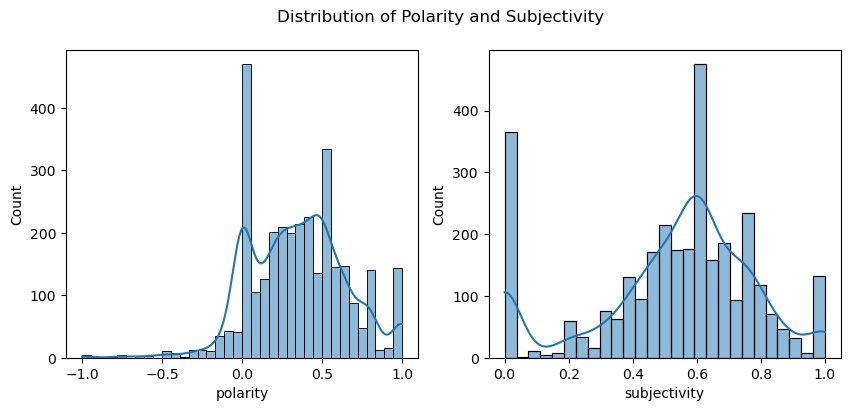

In [48]:
# draw the histgrams to show the distributions of polarity and subjectivity
plt.rcParams['figure.figsize']=(10, 4)

plt.subplot(1, 2, 1)
sns.histplot(data['polarity'],kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data['subjectivity'],kde=True)

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

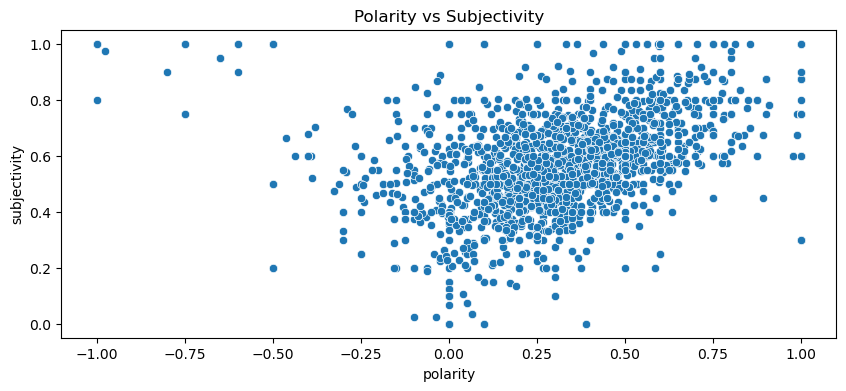

In [49]:
# plot the relationship between subjectivity and polarity
sns.scatterplot(x=data['polarity'], y=data['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

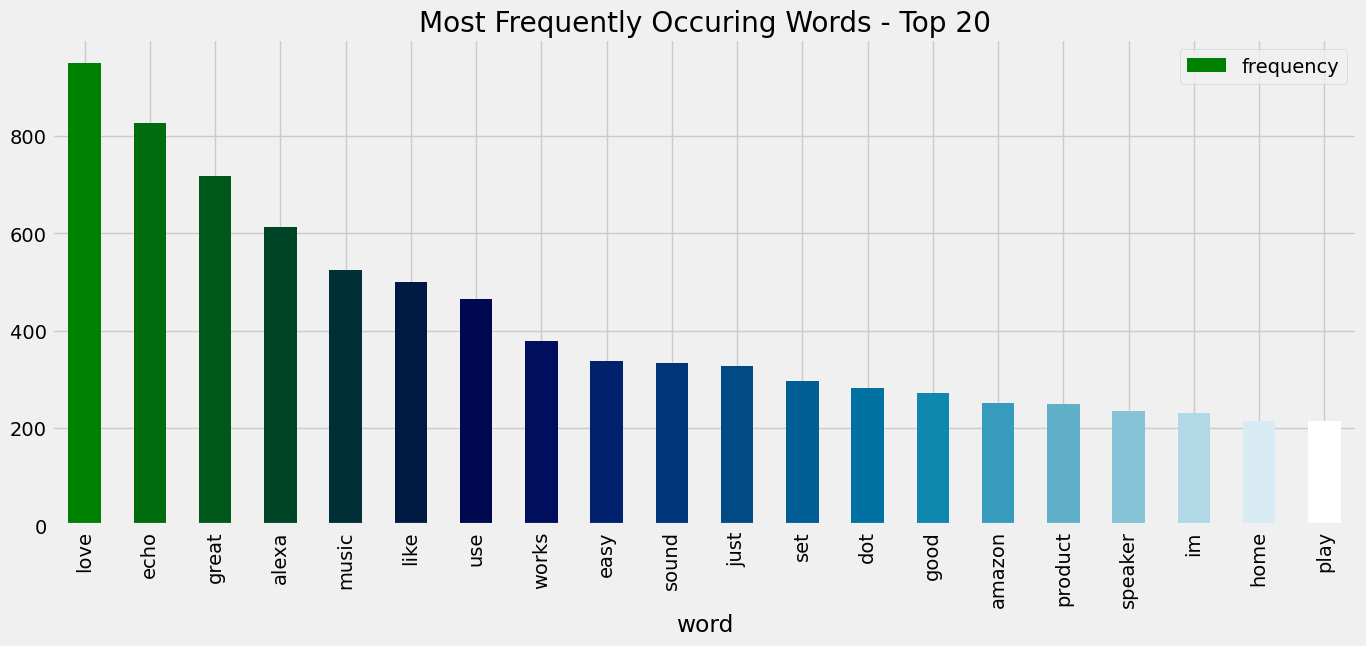

In [50]:
# visualize the most frequent words
# This step will take a bit long time to run, so we analyze a subset only

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# get rid of the stopwords and generate a matrix of token counts
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)

# calculate the frequency of appeared tokens
sum_words=words.sum(axis=0)

# take out the appeared tokens and their indexes. then retrive the frequency of those tokens and their
# total frequency
words_freq=[(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]

# sort the tokens based on their frequency (x[1]) in a descending order (reserse=True)
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

# store the results into a dataframe
frequency=pd.DataFrame(words_freq, columns=['word', 'frequency'])

# visualize the results
plt.style.use('fivethirtyeight')
color=plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='frequency', kind='bar', figsize=(15, 6), color=color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

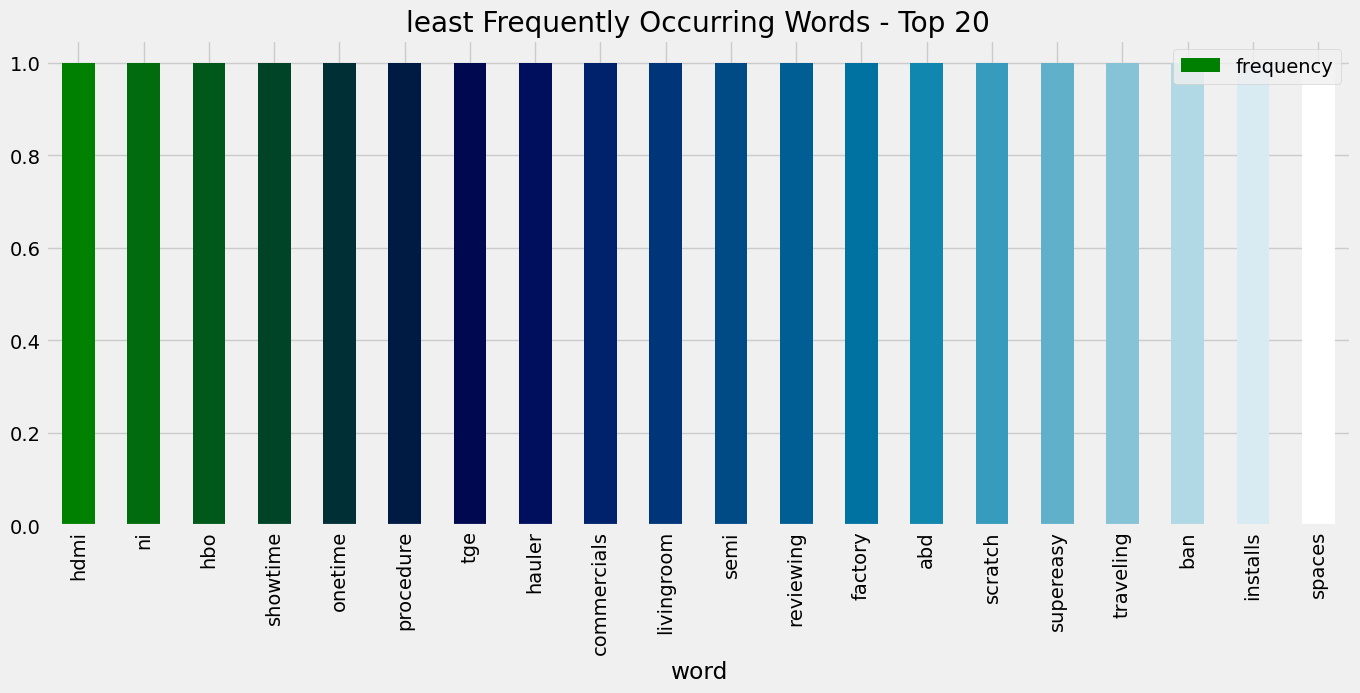

In [51]:
# similarly we visualize least frquent words 
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(data.verified_reviews)
sum_words=words.sum(axis=0)

words_freq=[(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)
frequency=pd.DataFrame(words_freq, columns=['word', 'frequency'])

plt.style.use('fivethirtyeight')
color=plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='frequency', kind='bar', figsize=(15, 6), color=color)
plt.title("least Frequently Occurring Words - Top 20")
plt.show()

In [52]:
# visualize N-grams
import nltk
import collections

# function for making ngrams
from nltk.util import ngrams

# for reading the dataset
import pandas as pd

In [54]:
text=str(data['verified_reviews'])
tokenized=text.split()

# get a list of all bi-grams
esBigrams=ngrams(tokenized, 2)

# get the frequency of each bigram in our corpus
esBigramFreq=collections.Counter(esBigrams)

# 10 most popular bi-grams
esBigramFreq.most_common(10)

[(('I', 'have'), 2),
 (('0', 'Love'), 1),
 (('Love', 'my'), 1),
 (('my', 'Echo'), 1),
 (('Echo', '1'), 1),
 (('1', 'Loved'), 1),
 (('Loved', 'it'), 1),
 (('it', '2'), 1),
 (('2', 'Sometimes'), 1),
 (('Sometimes', 'while'), 1)]

In [57]:
# visualize tri-grams
# get a list of all tri-grams
esTrigrams=ngrams(tokenized, 3)

# get the frequency of each bigram in our corpus
esTrigramFreq=collections.Counter(esTrigrams)

# 10 most popular bi-grams
esTrigramFreq.most_common(10)

[(('0', 'Love', 'my'), 1),
 (('Love', 'my', 'Echo'), 1),
 (('my', 'Echo', '1'), 1),
 (('Echo', '1', 'Loved'), 1),
 (('1', 'Loved', 'it'), 1),
 (('Loved', 'it', '2'), 1),
 (('it', '2', 'Sometimes'), 1),
 (('2', 'Sometimes', 'while'), 1),
 (('Sometimes', 'while', 'playing'), 1),
 (('while', 'playing', 'a'), 1)]

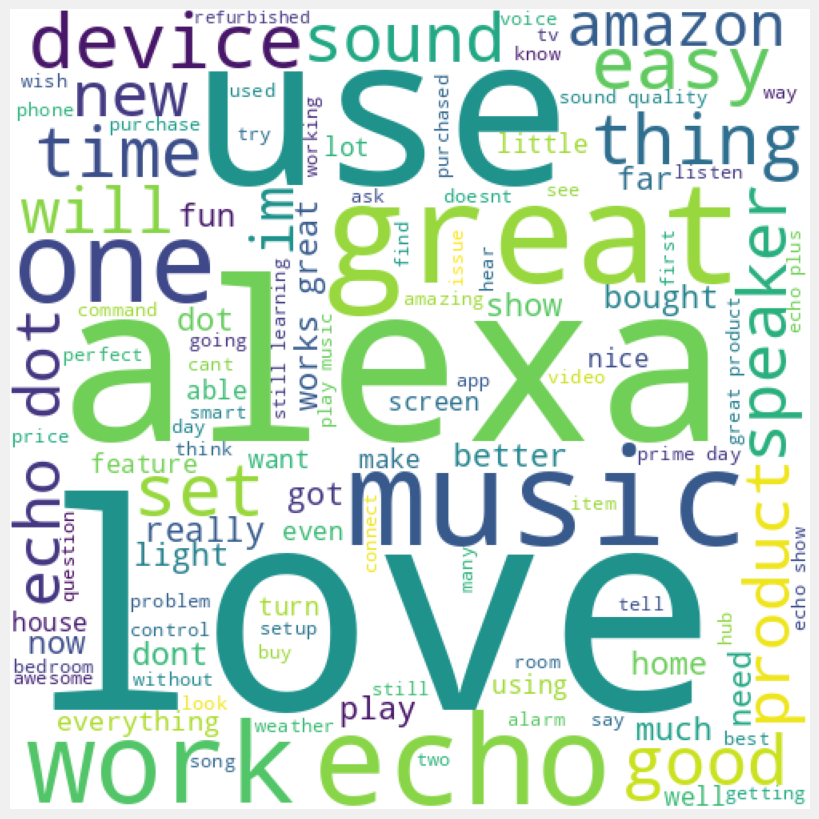

In [58]:
from wordcloud import WordCloud, STOPWORDS

words_freq = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.verified_reviews:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words_freq += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500, background_color ='white', stopwords = stopwords,
                      min_font_size = 10).generate(words_freq)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Part 6 - Text Classification

In [59]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/philhuang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
corpus=[]

for i in range(0, 3150):
    # get rid of the characters that are not letters
    review=re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    # change words to lower case
    review=review.lower()
    # split the review
    review=review.split()
    # stemming
    ps=PorterStemmer()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

# using tf-idf model
tf=TfidfVectorizer(max_features=2500)
x=tf.fit_transform(corpus).toarray()
y=data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [62]:
from sklearn.model_selection import train_test_split

# get the train and test data
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=15, stratify=y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


#### Note that here our sample is highly inbalanced.

In [63]:
print('y_train')
print('positive: {0}; negative: {1}'.format(y_train.sum(), len(y_train)-y_train.sum()))

print('y_test')
print('positive: {0}; negative: {1}'.format(y_test.sum(), len(y_test)-y_test.sum()))

y_train
positive: 2025; negative: 180
y_test
positive: 868; negative: 77


#### There might be problems if we apply the multinomialNB directly to the training data.

In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model=MultinomialNB()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)

print("Training Accuracy:", model.score(x_train, y_train))
print("Testing Accuracy:", model.score(x_test, y_test))
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9183673469387755
Testing Accuracy: 0.9174603174603174
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.92      1.00      0.96       868

    accuracy                           0.92       945
   macro avg       0.46      0.50      0.48       945
weighted avg       0.84      0.92      0.88       945



### Use SMOTE with oversampling to deal with the inbalanced data

In [65]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [66]:
# compile the cleaned texts into the dataset
data['corpus'] = np.array(corpus)

# vectorize the texts
data['vector'] = data['corpus'].apply(lambda text:nlp(text).vector)

In [67]:
data.head(5)

,rating,date,variation,verified_reviews,feedback,length,polarity,subjectivity,char_count,word_count,word_density,punctuation_count,noun_count,verb_count,pron_count,adj_count,adv_count,corpus,vector
0,5,31-Jul-18,Charcoal Fabric,Love my Echo,1,13,0.625,0.6000,13,3,3.250000,1,1,1,1,0,0,love echo,"[1.49991, -0.39039993, -1.29785, -1.9123499, -..."
1,5,31-Jul-18,Charcoal Fabric,Loved it,1,9,0.875,0.8000,9,2,3.000000,1,0,1,1,0,0,love,"[2.0565, -3.2259, -5.7364, -6.146, 0.15748, -2..."
2,4,31-Jul-18,Walnut Finish,Sometimes while playing a game you can answer ...,1,195,-0.100,0.5125,195,38,5.000000,3,5,8,5,3,3,sometim play game answer question correctli al...,"[-0.12526786, 1.4279623, -0.40608767, -0.19978..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing My yr...,1,172,0.350,0.4500,172,34,4.914286,4,11,6,2,1,5,lot fun thing yr old learn dinosaur control li...,"[-0.43227947, 1.4473643, -2.0029287, -2.033994..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.000,0.0000,5,1,2.500000,0,0,0,0,1,0,music,"[-0.55237, 0.45954, -2.0102, -5.9105, -0.47469..."


In [68]:
x, y = data.vector, data.feedback

In [69]:
y.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [70]:
x_arr = np.stack(np.array(x))
y_arr = np.stack(np.array(y))

In [71]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE with a sampling strategy of 'minority'. SMOTE will create synthetic samples until 
# the number of samples in the minority class is equal to the number of samples in the majority class. 
# This helps balance the class distribution.
smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE oversampling on your data
#x = np.stack(x)
x_sm, y_sm = smote.fit_resample(x_arr, y_arr)

/Users/philhuang/opt/anaconda3/envs/py3k/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [72]:
# get the train and test data
x_train, x_test, y_train, y_test=train_test_split(x_sm, y_sm, test_size=0.3, 
                                                  random_state=15, stratify=y_sm)

In [73]:
# scale the data. multinomialNB does not support negative numbers
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(x_train)
scaled_test_embed  = scaler.transform(x_test)

In [74]:
scaled_test_embed

array([[0.3418083 , 0.55269027, 0.7422281 , ..., 0.50495106, 0.6450892 ,
        0.45467204],
       [0.22719201, 0.5783548 , 0.674084  , ..., 0.40205956, 0.9211621 ,
        0.47896978],
       [0.43156648, 0.5768638 , 0.58827275, ..., 0.41141126, 0.6641888 ,
        0.3951846 ],
       ...,
       [0.41722474, 0.54145426, 0.52762127, ..., 0.4289423 , 0.6933012 ,
        0.39446154],
       [0.39127278, 0.46601146, 0.59078515, ..., 0.4183931 , 0.6447612 ,
        0.5119882 ],
       [0.3942399 , 0.6500817 , 0.47779042, ..., 0.4302286 , 0.69646806,
        0.4687484 ]], dtype=float32)

In [75]:
# apply the model to the data and see the model fit
model=MultinomialNB()
model.fit(scaled_train_embed, y_train)

y_pred=model.predict(scaled_test_embed)

print("Training Accuracy:", model.score(scaled_train_embed, y_train))
print("Testing Accuracy:", model.score(scaled_test_embed, y_test))
print(classification_report(y_test, y_pred))

Training Accuracy: 0.8017283950617284
Testing Accuracy: 0.7805299539170507
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       868
           1       0.89      0.64      0.75       868

    accuracy                           0.78      1736
   macro avg       0.80      0.78      0.78      1736
weighted avg       0.80      0.78      0.78      1736



In [76]:
from sklearn.metrics import confusion_matrix

# print the confusion matrix
#                   |  Predicted |  Predicted
#                   |  NEGATIVE  |  POSITIVE  |
#----------------------------------------------
#Actual NEGATIVE    |    TN      |    FP      |
#Actual POSITIVE    |    FN      |    TP      |

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[797  71]
 [310 558]]


In [77]:
# SVM model
from sklearn.svm import SVC

model=SVC()
model.fit(scaled_train_embed, y_train)

y_pred=model.predict(scaled_test_embed)

print("Training Accuracy:", model.score(scaled_train_embed, y_train))
print("Testing Accuracy:", model.score(scaled_test_embed, y_test))
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9409876543209876
Testing Accuracy: 0.9153225806451613
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       868
           1       0.98      0.84      0.91       868

    accuracy                           0.92      1736
   macro avg       0.92      0.92      0.91      1736
weighted avg       0.92      0.92      0.91      1736



### Use of ensemble with undersampling

In [78]:
# get the train and test data
x_train, x_test, y_train, y_test=train_test_split(x_arr, y_arr, test_size=0.3, 
                                                  random_state=15, stratify=y_arr)

In [79]:
len(y_train), len(y_train)-y_train.sum()

(2205, 180)

In [80]:
positive_data = copy.deepcopy(data[data['feedback']==1])
negative_data = copy.deepcopy(data[data['feedback']==0])

In [81]:
x = data['vector']
y = data['feedback']

In [82]:
# get the train and test data
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, 
                                                  random_state=15, stratify=y_arr)

In [83]:
new_data = pd.DataFrame(data={'x_train':x_train, 'y_train':y_train}).reset_index(drop=True)

# now we separate the positive and nagative obs apart
positive_data = copy.deepcopy(new_data[new_data['y_train']==1])
negative_data = copy.deepcopy(new_data[new_data['y_train']==0])

print(len(positive_data), len(negative_data))

2025 180


In [84]:
# generate group id
int_lst  = list(range(11))
prob_lst = [0.1]*11
random.seed(11)
id_lst   = random.choices(int_lst, prob_lst, k=len(positive_data))

positive_data['group_id'] = np.array(id_lst)

In [85]:
# take out the first group 
sub_data = copy.deepcopy(positive_data[positive_data['group_id']==0].drop(columns=['group_id']))

# concat the positive obs with the nagative obs
sub_data = pd.concat([sub_data, negative_data]) 

sub_data['y_train'].value_counts()

1    183
0    180
Name: y_train, dtype: int64

In [86]:
# get data for training
x_train = sub_data['x_train'].values
y_train = sub_data['y_train'].values

In [87]:
# use MinMax scaler to transform the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(np.stack(x_train))
scaled_test_embed  = scaler.transform(np.stack(x_test))

In [88]:
model=MultinomialNB()
model.fit(scaled_train_embed, y_train)

y_pred=model.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.92      0.28        77
           1       0.99      0.59      0.74       868

    accuracy                           0.62       945
   macro avg       0.58      0.76      0.51       945
weighted avg       0.92      0.62      0.71       945



#### we pack the above process to a fucntion 

In [89]:
def get_ensemble_pred(groupID):
    
    # take out the corresponding group 
    sub_data = copy.deepcopy(positive_data[positive_data['group_id']==groupID].drop(columns=['group_id']))

    # concat the positive obs with the nagative obs
    sub_data = pd.concat([sub_data, negative_data]) 

    # check the balance of the data
    print(sub_data['y_train'].value_counts())
    
    # get data for training
    x_train = sub_data['x_train'].values
    y_train = sub_data['y_train'].values
    
    # use MinMax scaler to transform the data
    scaler = MinMaxScaler()
    scaled_train_embed = scaler.fit_transform(np.stack(x_train))
    scaled_test_embed  = scaler.transform(np.stack(x_test))
    
    # fit the model to the training data and then make predictions
    model=MultinomialNB()
    model.fit(scaled_train_embed, y_train)
    y_pred=model.predict(scaled_test_embed)

    print(classification_report(y_test, y_pred))
    
    print('Group {} finished.'.format(groupID))
    return y_pred

In [90]:
# generate an array to store the results
votes = np.zeros(len(y_test))

# make predictions on each sub-dataset
for groupID in range(11):
    pred_rst = get_ensemble_pred(groupID)
    votes   += pred_rst

1    183
0    180
Name: y_train, dtype: int64
              precision    recall  f1-score   support

           0       0.17      0.92      0.28        77
           1       0.99      0.59      0.74       868

    accuracy                           0.62       945
   macro avg       0.58      0.76      0.51       945
weighted avg       0.92      0.62      0.71       945

Group 0 finished.
0    180
1    172
Name: y_train, dtype: int64
              precision    recall  f1-score   support

           0       0.20      0.95      0.33        77
           1       0.99      0.66      0.79       868

    accuracy                           0.69       945
   macro avg       0.60      0.81      0.56       945
weighted avg       0.93      0.69      0.76       945

Group 1 finished.
1    195
0    180
Name: y_train, dtype: int64
              precision    recall  f1-score   support

           0       0.18      0.95      0.31        77
           1       0.99      0.63      0.77       868

    accu

In [91]:
# define a function to calculate the majority votes
def maj_votes(x):
    if x>5:
        return 1
    else:
        return 0

In [92]:
# apply the majority votes to the data
final_rst = pd.DataFrame(data={'y_test': y_test, 'votes': votes,})
final_rst['y_pred'] = final_rst['votes'].apply(lambda x: maj_votes(x))

In [93]:
print(classification_report(final_rst['y_test'], final_rst['y_pred']))

              precision    recall  f1-score   support

           0       0.19      0.94      0.31        77
           1       0.99      0.64      0.78       868

    accuracy                           0.67       945
   macro avg       0.59      0.79      0.55       945
weighted avg       0.93      0.67      0.74       945



#### It looks like SVC provides the best results.

# Part 7 - Sentiment Analysis
* install needed libaries first
* Tweepy is a python library for accessing the Twitter API.

In [94]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [95]:
# read in the data 
data= pd.read_csv(path+'amazon_alexa.tsv', sep='\t')

In [96]:
# clear other characters, including: @username; non-alphanumeric characters; matches URLs 
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(http://[\w.]+/[\w]+)", " ", text).split())

data['cleaned_reviews']=data['verified_reviews'].apply(clean_data)

In [97]:
# drop all numbers
def drop_numbers(list_text):
    list_text_new=[]
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

data['cleaned_reviews']=data['cleaned_reviews'].apply(drop_numbers)

In [98]:
# change all to lower case
def lower_case(text):
    text_words=word_tokenize(text)
    text_words_lower=[x.lower() for x in text_words]
    return ' '.join(text_words_lower)

data['cleaned_reviews']=data['cleaned_reviews'].apply(lower_case)

In [99]:
# lemmatization
import nltk
nltk.download('wordnet')

lemmatizer=WordNetLemmatizer()

# lemmatise the texts
def lemmatise(text):
    text_tokens=word_tokenize(text)
    text_lemm=[lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

data['cleaned_reviews']=data['cleaned_reviews'].apply(lemmatise)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/philhuang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [100]:
# remove stopwords
def remove_stopwords(text):
    text_tokens=word_tokenize(text)
    tokens=[word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text=' '.join(tokens)
    return tokens_text

data['cleaned_reviews']=data['cleaned_reviews'].apply(remove_stopwords)

In [101]:
data.head()

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing yr old learns dinosaur control l...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


In [102]:
def get_polarity(text):
    textblob=TextBlob(str(text))
    pol=textblob.sentiment.polarity
    if(pol==0):
        return 'Neutral'
    elif(pol>0 and pol<=0.3):
        return 'Weakly Positive'
    elif(pol>0.3 and pol<=0.6): 
        return '"Positive'
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return 'Weakly Negative'
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return 'Strongly Negative'
    
data['polarity']=data['cleaned_reviews'].apply(get_polarity)

In [103]:
data['polarity'].value_counts()

"Positive            1294
Weakly Positive       760
Strongly Positive     497
Neutral               425
Weakly Negative       131
Negative               30
Strongly Negative      11
Name: polarity, dtype: int64

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
 5   cleaned_reviews   3150 non-null   object
 6   polarity          3148 non-null   object
dtypes: int64(2), object(5)
memory usage: 172.4+ KB


In [107]:
neutral=0
wpositive=0
spositive=0
positive=0
negative=0
wnegative=0
snegative=0
polarity=0

# calculate the frequency of different sentiments
for i in range(0, 3150):
    textblob=TextBlob(str(data['cleaned_reviews'][i]))
    polarity+=textblob.sentiment.polarity
    pol=textblob.sentiment.polarity
    if (pol==0): 
        neutral+=1
    elif (pol > 0 and pol <= 0.3):
        wpositive +=1
    elif (pol > 0.3 and pol <= 0.6):
        positive +=1
    elif (pol > 0.6 and pol <= 1):
        spositive+=1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative +=1 
    elif (pol > -1 and pol <=-0.6):
        snegative +=1

In [106]:
# averge reaction
polarity=polarity/len(data['cleaned_reviews'])
polarity

0.3401034727406135

In [108]:
def percentage(part, whole):
    temp=100*float(part)/float(whole)
    return format(temp, '.2f')

In [109]:
# finding avrage of how people are reacting
NoOfTerms=len(data['cleaned_reviews'])
positive=percentage(positive, NoOfTerms)
wpositive=percentage(wpositive, NoOfTerms)
spositive=percentage(spositive, NoOfTerms)
negative=percentage(negative, NoOfTerms)
wnegative=percentage(wnegative, NoOfTerms)
snegative=percentage(snegative, NoOfTerms)
neutral=percentage(neutral, NoOfTerms)

In [113]:
# print out the data
print("How people are reacting on Amazon Echo by analyzing "+str(NoOfTerms)+" reviews.")
print()
print("------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity==0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print('Strongly Positive')
elif (polarity > -0.3 and polarity <=0):
    print('Weakly Negative')
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")
    
print()
print("----------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive)+"% people thought it was positive")
print(str(wpositive)+"% people thought it was weakly positive")
print(str(spositive)+"% people thought it was strongly positive")
print(str(negative)+"% people thought it was negative")
print(str(wnegative)+"% people thought it was weakly negative")
print(str(snegative)+"% people thought it was strongly negative")
print(str(neutral)+"% people thought it was neutral")

How people are reacting on Amazon Echo by analyzing 3150 reviews.

------------------------------------------------------------------

General Report: 

----------------------------------------------------------------

Detailed Report: 
41.08% people thought it was positive
24.13% people thought it was weakly positive
15.78% people thought it was strongly positive
0.95% people thought it was negative
4.16% people thought it was weakly negative
0.35% people thought it was strongly negative
13.49% people thought it was neutral


In [114]:
sizes=[positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors=['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred']
labels=['Positive['+str(positive)+'%]', 'Weakly Positive['+str(wpositive)+'%]', 'Strongly Positive['+str(spositive)+'%]', 
        'Neutral['+str(neutral)+'%]', 'Negative['+str(negative)+'%]', 'Weakly Negative['+str(wnegative)+'%]', 
        'Strongly Negative['+str(snegative)+'%]']

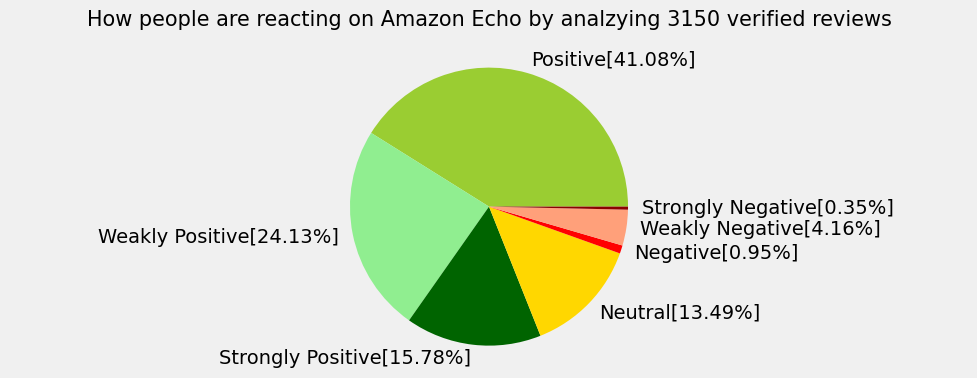

In [115]:
plt.pie(sizes, labels=labels, colors=colors)
#plt.legend(labels, loc='best')
plt.title("How people are reacting on Amazon Echo by analzying "+str(NoOfTerms)+" verified reviews", 
          fontsize=15, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()